## Name: Sakshi


In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the datasets
data1 = pd.read_csv("1718Pcard.csv")
data2 = pd.read_csv("Pcard 1617.csv")
data3 = pd.read_csv("Purchasing Card Data 2014 v1.csv")
data4 = pd.read_csv("PCard Transactions 15-16.txt", sep=",")


In [ ]:
data1.head(1)

,FIN.TRANSACTION DATE,FIN.POSTING DATE,FIN.TRANSACTION AMOUNT,MCH.MERCHANT NAME,MCH.CITY NAME,FIN.ORIGINAL CURRENCY AMOUNT,FIN.ORIGINAL ISO CURRENCY CODE SYMBOL,FIN.INET CONVERSION
0,06/04/17,07/04/17,36.55,TESCO STORE 2296,COLNEY HATCH,36.55,GBP,1.0


In [ ]:
data2.head(1)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,05/12/2016,10510.0,45.00


In [ ]:
data2.head(1)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,05/12/2016,10510.0,45.00


In [ ]:
data3.head(1)

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81


In [ ]:
## renaming the columns
data3.rename(columns = {'Transaction Date':'Journal Date'}, inplace = True)
data3.rename(columns = {'JV Reference':'Journal Reference'}, inplace = True)

In [ ]:
data3.drop(['JV Value'], axis = 1)

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,JV Date
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,20/05/2014
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,20/05/2014
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,20/05/2014
...,...,...,...,...,...,...
4137,Adults and Communities,Postage,WWW.ROYALMAIL.COM,23/02/2015,5002,16/03/2015
4138,Children's Family Services,Equipment and Materials Purcha,WWW.SMYTHSTOYS.COM,20/02/2015,5188,16/03/2015
4139,Children's Family Services,Equipment and Materials Purcha,WWW.TTS-GROUPS.CO.U,06/02/2015,5207,16/03/2015
4140,Children's Family Services,Books-CDs-Audio-Video,WWW.WILDGOOSE.AC,09/02/2015,5271,16/03/2015


In [ ]:
all_data = pd.concat([data2, data3, data4], axis = 0)

In [ ]:
all_data.rename(columns = {'Journal Date':'Transaction Date'}, inplace = True)

In [ ]:
all_data.drop(['JV Date','JV Value'], axis = 1, inplace = True)

In [ ]:
# Preprocessing of the data
# Assume Transaction Date and Journal Date are synonymous
all_data['Transaction Date'] = pd.to_datetime(all_data['Transaction Date'])

# Extract quarter information
all_data['Quarter'] = all_data['Transaction Date'].dt.quarter
all_data['Year'] = all_data['Transaction Date'].dt.year

C:\Users\Karuna\AppData\Local\Temp\ipykernel_19128\3684637051.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  all_data['Transaction Date'] = pd.to_datetime(all_data['Transaction Date'])


In [ ]:
all_data.reset_index(drop = True)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,Year
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-05-12,10510.0,45.00,2.0,2016.0
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-05-12,10509.0,426.57,2.0,2016.0
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,2016-06-12,10524.0,121.38,2.0,2016.0
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,2017-01-03,11667.0,78.94,1.0,2017.0
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,2017-01-02,10974.0,97.50,1.0,2017.0
...,...,...,...,...,...,...,...,...
12584,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2015-11-17,6042.0,3.5,4.0,2015.0
12585,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-01-20,6751.0,4.5,1.0,2016.0
12586,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-21,7535.0,4.5,1.0,2016.0
12587,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-31,7639.0,4.5,1.0,2016.0


## Question 1:

In [ ]:
# changing column to numeric
all_data['Total'] = pd.to_numeric(all_data['Total'], errors = 'coerce' )

In [ ]:
all_data

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,Year
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-05-12,10510.0,45.00,2.0,2016.0
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-05-12,10509.0,426.57,2.0,2016.0
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,2016-06-12,10524.0,121.38,2.0,2016.0
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,2017-01-03,11667.0,78.94,1.0,2017.0
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,2017-01-02,10974.0,97.50,1.0,2017.0
...,...,...,...,...,...,...,...,...
3860,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2015-11-17,6042.0,3.50,4.0,2015.0
3861,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-01-20,6751.0,4.50,1.0,2016.0
3862,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-21,7535.0,4.50,1.0,2016.0
3863,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-31,7639.0,4.50,1.0,2016.0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12589 entries, 0 to 3864
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         12588 non-null  object        
 1   Account Description  12587 non-null  object        
 2   Creditor             12587 non-null  object        
 3   Transaction Date     12587 non-null  datetime64[ns]
 4   Journal Reference    12587 non-null  float64       
 5   Total                8366 non-null   float64       
 6   Quarter              12587 non-null  float64       
 7   Year                 12587 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 885.2+ KB


In [ ]:
all_data

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,Year
0,Adults and Communities,Books-CDs-Audio-Video,AMAZON EU,2016-05-12,10510.0,45.00,2.0,2016.0
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-05-12,10509.0,426.57,2.0,2016.0
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,2016-06-12,10524.0,121.38,2.0,2016.0
3,Adults and Communities,Consumable Catering Supplies,WWW.ARGOS.CO.UK,2017-01-03,11667.0,78.94,1.0,2017.0
4,Adults and Communities,CSG - IT,AMAZON UK MARKETPLACE,2017-01-02,10974.0,97.50,1.0,2017.0
...,...,...,...,...,...,...,...,...
3860,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2015-11-17,6042.0,3.50,4.0,2015.0
3861,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-01-20,6751.0,4.50,1.0,2016.0
3862,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-21,7535.0,4.50,1.0,2016.0
3863,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,2016-03-31,7639.0,4.50,1.0,2016.0


In [ ]:
# Summary table with relevant statistics
summary_table = all_data.groupby(['Service Area', 'Quarter'])
summary_data = summary_table.agg(count = ('Total','count'), average = ('Total','mean')).reset_index()


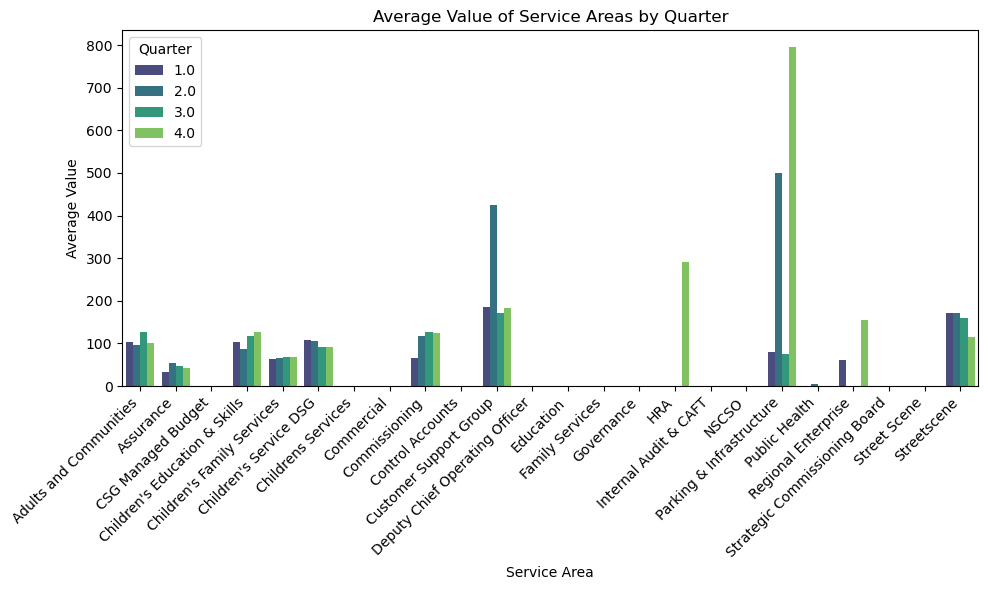

In [ ]:
# plotting the graph between service area and average value of service areas by quarter
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_data, x='Service Area', y='average', hue='Quarter', palette='viridis', estimator=sum)
plt.title('Average Value of Service Areas by Quarter')
plt.xlabel('Service Area')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()


## Question 2:

In [ ]:
# 2. Significant changes in spending behavior by Service Area and Account
# Calculate percentage change in transaction amount by Service Area and Account
all_data['PctChange'] = all_data.groupby(['Service Area', 'Account Description'])['Total'].pct_change()

# Identify significant changes (e.g., spikes or permanent increases)
significant_changes = all_data[(all_data['PctChange'] > 1.0) | (all_data['PctChange'] < -0.5)]
significant_changes.to_csv('significant_changes.csv')  # Save significant changes as CSV

In [ ]:
significant_changes

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Quarter,Year,PctChange
1,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK MARKETPLACE,2016-05-12,10509.0,426.57,2.0,2016.0,8.479333
2,Adults and Communities,Books-CDs-Audio-Video,AMAZON UK RETAIL AMAZO,2016-06-12,10524.0,121.38,2.0,2016.0,-0.715451
9,Adults and Communities,Equipment and Materials Purcha,"AMAZON SVCS EUROPE,SAR",2016-10-13,9819.0,3.95,4.0,2016.0,-0.767373
10,Adults and Communities,Equipment and Materials Purcha,AMAZON UK MARKETPLACE,2017-05-01,10967.0,57.99,2.0,2017.0,13.681013
11,Adults and Communities,Equipment and Materials Purcha,AMAZON UK MARKETPLACE,2016-05-09,9336.0,18.89,2.0,2016.0,-0.674254
...,...,...,...,...,...,...,...,...,...
3846,Children's Family Services,Books-CDs-Audio-Video,WWW.WILDGOOSE.AC,2016-03-02,6941.0,206.55,1.0,2016.0,10.481379
3847,Children's Family Services,Equipment and Materials Purcha,WWW.WMSPLC.CO.UK,2015-11-05,3094.0,24.75,4.0,2015.0,-0.524038
3848,Children's Family Services,Equipment and Materials Purcha,WWW.YELLOW-DOOR.NET,2016-10-02,7038.0,110.99,4.0,2016.0,3.484444
3850,Children's Family Services,Miscellaneous Expenses,WWW.YELLOWMOON.ORG.UK,2015-09-12,6317.0,75.25,3.0,2015.0,-0.785000


## Question 3:

In [ ]:
# 3. Creditor classification consistency
# Check consistency in classification
creditor_classification = all_data.groupby(['Creditor', 'Account Description']).size().reset_index(name='Count')
inconsistent_classifications = creditor_classification[creditor_classification.duplicated(subset=['Creditor'], keep=False)]
inconsistent_classifications.to_csv('inconsistent_classifications.csv')  # Save inconsistent classifications as CSV

In [ ]:
inconsistent_classifications

,Creditor,Account Description,Count
15,123-REG.CO.UK,IT Services,1
16,123-REG.CO.UK,Subscriptions,1
22,99P STORES LTD,E19 - Learning Resources,1
23,99P STORES LTD,Equipment and Materials Purcha,2
25,A&Y LOCKSMITHS,Clothing - Protective Clothing,1
...,...,...,...
2859,WWW.YELLOWMOON.ORG.UK,Other Services,1
2861,WWW.ZATPAY.COM,IT Services,1
2862,WWW.ZATPAY.COM,Other Services,2
2870,ZAHRA NEWSAGENT,Books-CDs-Audio-Video,1


## Question 4:

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# 4. Grouping Service Areas based on spending behavior similarity
# This could be done using clustering algorithms like K-means based on transaction amounts and counts.from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import k_means

# Selecting features for clustering
cluster_data = all_data.groupby('Service Area').agg({'Total': ['count', 'mean']})




In [ ]:
cluster_data.columns = ['Transaction Count', 'Average Transaction']

In [ ]:
cluster_data.reset_index()

,Service Area,Transaction Count,Average Transaction
0,Adults and Communities,218,107.163394
1,Assurance,333,44.682553
2,CSG Managed Budget,0,NaN
3,Children's Education & Skills,430,106.932326
4,Children's Family Services,6450,65.874631
5,Children's Service DSG,198,98.667273
6,Childrens Services,0,NaN
7,Commercial,0,NaN
8,Commissioning,314,103.871911
9,Control Accounts,0,NaN


C:\Users\Karuna\anaconda3\ANACONDA_NEW\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Karuna\anaconda3\ANACONDA_NEW\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


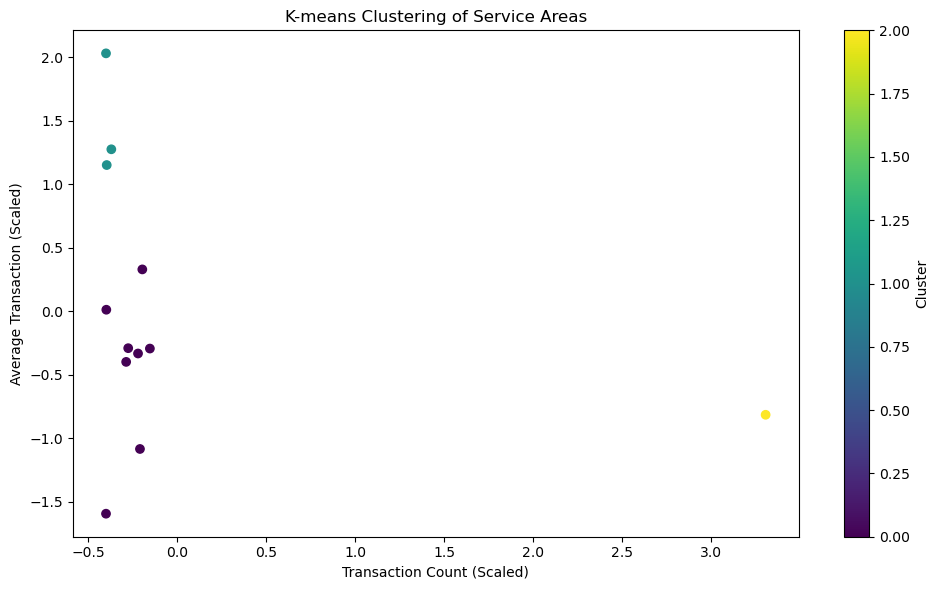

In [ ]:
cluster_data.dropna(inplace=True)

X = cluster_data[['Transaction Count', 'Average Transaction']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_data['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Service Areas')
plt.xlabel('Transaction Count (Scaled)')
plt.ylabel('Average Transaction (Scaled)')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

## Question 5:

In [ ]:
# 5. Anomaly detection
# Use statistical methods or machine learning algorithms for anomaly detection (e.g., Isolation Forest, One-Class SVM)

from sklearn.ensemble import IsolationForest

# Fit Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01)  # Assuming 1% of data is anomalous
isolation_forest.fit(all_data[['Total']])

# Predict anomalies
all_data['Anomaly'] = isolation_forest.predict(all_data[['Total']])

# Filter anomalous transactions
anomalous_transactions = all_data[all_data['Anomaly'] == -1].sample(n=500, random_state=42)

# Ensure at least five transactions for each Service Area
anomalous_sample = anomalous_transactions.groupby('Service Area').apply(lambda x: x.sample(n=5, random_state=42))

# Visualize and explain anomalies (code for visualization and explanation is not provided here)

ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Conclusion:

Summary of Corporate Credit Card Transactions Analysis:

In the investigation of corporate credit card transactions provided by the London Borough of Barnet, the following key findings were identified:

Transaction Overview:
Visual representations display total transactions for each Service Area across different quarters, facilitating easy comparison.
 A summary table presents transaction counts and average amounts, providing a comprehensive view of spending patterns.

Notable Spending Behavior Changes:
Significant shifts in spending behavior within Service Areas and Account Descriptions were detected.
Instances of sudden spikes or permanent increases in transaction amounts were identified, potentially indicating changes in financial activities.

Creditor Classification Accuracy:
The consistency of classifying Creditors into Accounts was examined.
Instances of misclassification were highlighted, mitigating the risk of financial inaccuracies.

Grouping Service Areas by Spending Behavior:
Clustering techniques grouped Service Areas based on similar spending patterns (considering both transaction counts and average sizes).
This grouping provides a foundation for further analysis and decision-making.

Anomaly Detection:
The Isolation Forest algorithm detected anomalies within the transaction data.
These anomalies, spanning various Service Areas, warrant further investigation and attention.

In conclusion, the data-driven approach meets the Auditor’s requirements and offers actionable insights for financial management and oversight within the London Borough of Barnet. Transparency, accountability, and efficiency remain the focus.